<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: Data Scientist в Segmento Екатерина Демидова

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [2]:
df = pd.read_csv('../../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,NaN,NaN,NaN,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,NaN,NaN,NaN,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/jugru/blog/309554/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* март 2015,
* апрель 2015,
* апрель 2016.

In [12]:
df.groupby(['year', 'month']).size()

print(df.groupby(['year', 'month']).size()[2016][3])
print(df.groupby(['year', 'month']).size()[2015][3])
print(df.groupby(['year', 'month']).size()[2015][4])
print(df.groupby(['year', 'month']).size()[2016][4])

2115
2189
2110
1910


## 2\. Проанализируйте публикации в этом месяце

Выберите один или несколько вариантов:

* На графике не заметны какие-либо выбросы или аномалии,
* Один или несколько дней сильно выделяются из общей картины,
* На хабре _всегда_ больше статей, чем на гиктаймсе,
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [13]:
df['day'] = [d.day for d in df.published]

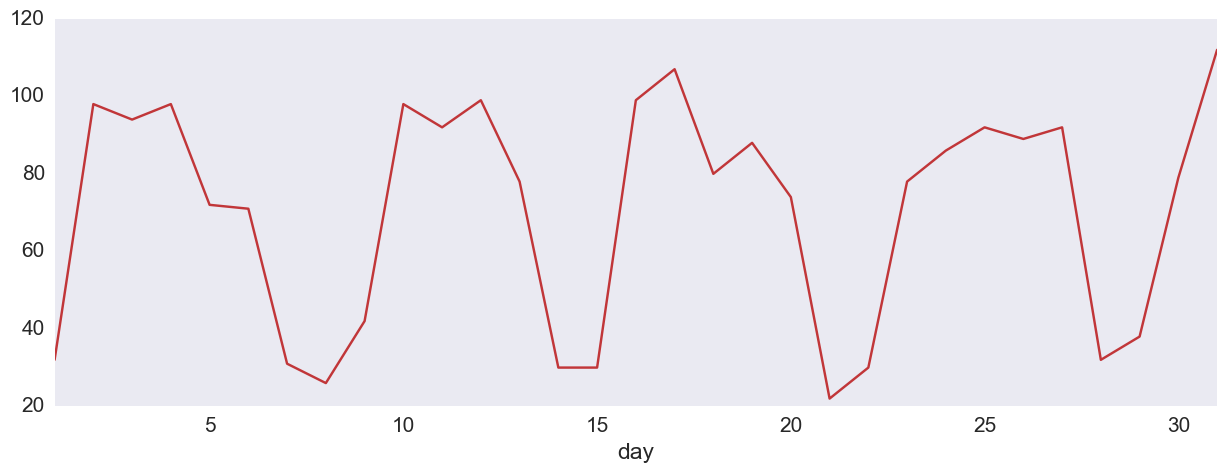

In [35]:
df[(df.year == 2015) & (df.month == 3)].groupby('day').size().plot()

In [33]:
df[(df.year == 2015) & (df.month == 3)].groupby(['domain', 'day']).size()['geektimes.ru'].values > df[(df.year == 2015) & (df.month == 3)].groupby(['domain', 'day']).size()['habrahabr.ru'].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [31]:
df.domain.unique()

array(['habrahabr.ru', 'geektimes.ru'], dtype=object)

In [39]:
df[(df.year == 2015) & (df.month == 3)].groupby(['dayofweek', 'domain']).size()

dayofweek  domain      
1          geektimes.ru    129
           habrahabr.ru    267
2          geektimes.ru    170
           habrahabr.ru    327
3          geektimes.ru    124
           habrahabr.ru    238
4          geektimes.ru    116
           habrahabr.ru    232
5          geektimes.ru    107
           habrahabr.ru    208
6          geektimes.ru     57
           habrahabr.ru     58
7          geektimes.ru     52
           habrahabr.ru    104
dtype: int64

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня;
* У опубликованных в 10 утра постов больше всего комментариев;
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра;
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
* На хабре дневные статьи комментируют чаще, чем вечерние.

In [45]:
df.groupby('hour')['views'].mean()

hour
0     17546.982349
1     17717.709114
2     17328.690581
3     18370.017972
4     20678.389091
5     17218.894242
6     21354.310115
7     19093.953408
8     16014.419048
9     16906.059099
10    16580.889909
11    16331.186818
12    16209.416141
13    15822.606055
14    15773.203785
15    14739.224017
16    16583.150731
17    15814.881313
18    16731.210843
19    16926.284287
20    18134.614873
21    17605.819064
22    18365.387460
23    17631.345932
Name: views, dtype: float64

In [43]:
df.groupby('hour')['comments'].mean()

hour
0     48.389066
1     49.417910
2     48.827025
3     53.123877
4     53.657273
5     47.816686
6     51.799618
7     43.263561
8     36.772222
9     37.303444
10    33.620052
11    34.768697
12    35.199744
13    35.811908
14    36.131046
15    36.113566
16    38.557664
17    39.046573
18    40.121553
19    41.832716
20    45.822556
21    46.669970
22    46.373220
23    45.212471
Name: comments, dtype: float64

In [50]:
df[(df.domain == 'geektimes.ru')].sort_values('views', ascending=False)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day
95669,https://geektimes.ru/post/252800/,geektimes.ru,252800,2015-01-28 18:02:00,@akibkalo,NaN,False,7452,Обновление с Windows 7/8.1 до Windows 10 TP че...,152,455,861000,36.0,5.0,2015,1,3,18,28
71623,https://geektimes.ru/post/189488/,geektimes.ru,189488,2013-08-09 11:53:00,@Drew003,NaN,False,13305,"Что делать, если «кина не будет» или как обойт...",87,1167,792000,96.0,24.0,2013,8,5,11,9
60355,https://geektimes.ru/post/257592/,geektimes.ru,257592,2012-11-11 04:19:00,@vvzvlad,NaN,False,20971,Прекратите скручивать!,331,4118,723000,667.0,15.0,2012,11,7,4,11
19054,https://geektimes.ru/post/81260/,geektimes.ru,81260,2010-01-19 19:29:00,@Budda40,NaN,False,666,До безобразия простой способ скачать видео с y...,165,126,578000,208.0,73.0,2010,1,2,19,19
63063,https://geektimes.ru/post/257720/,geektimes.ru,257720,2013-01-14 00:00:00,@lipskiy,NaN,False,32203,Светодиодная лента в качестве освещения комнаты,318,2222,557000,415.0,5.0,2013,1,1,0,14
61939,https://geektimes.ru/post/257670/,geektimes.ru,257670,2012-12-14 06:20:00,@vvzvlad,NaN,False,19070,Тульпа — карманная шизофрения для гиков или ре...,553,724,489000,83.0,78.0,2012,12,5,6,14
71733,https://geektimes.ru/post/189866/,geektimes.ru,189866,2013-08-12 22:45:00,@vsviridov,NaN,False,2701,Как я искал свой телефон с помощью Android Dev...,156,329,474000,99.0,13.0,2013,8,1,22,12
45258,https://geektimes.ru/post/257030/,geektimes.ru,257030,2011-11-27 23:21:00,@kfedorov,NaN,False,5886,Делаем приватный монитор из старого LCD монитора,319,3360,456000,1466.0,18.0,2011,11,7,23,27
77292,https://geektimes.ru/post/205038/,geektimes.ru,205038,2013-12-11 10:10:00,@GoldSerg,NaN,False,28701,Как я покупал 3D-принтер,483,517,448000,342.0,8.0,2013,12,3,10,11
11993,https://geektimes.ru/post/256202/,geektimes.ru,256202,2009-06-05 23:32:00,@Devix,NaN,False,6354,Мощный лазер своими руками за один вечер,471,1117,447000,481.0,18.0,2009,6,5,23,5


## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [63]:
top_autors = df.groupby('author').size().sort_values(ascending=False).head(20).keys()

In [64]:
df[df.author.isin(top_autors)].groupby('author')['votes_minus'].mean().sort_values(ascending=False)

author
@Mithgol             20.481081
@Jeditobe            16.491713
@XaocCPS             15.286913
@andorro             13.654676
@aleksandrit          9.974643
@Sterhel              9.350785
@alizar               7.928191
@Mordatyj             7.471455
@ilya42               6.216797
@Tylerskald           5.518519
@Shapelez             5.196998
@jeston               4.831917
@atomlib              4.407982
@SLY_G                4.276947
@ragequit             4.018018
@marks                3.834997
@ivansychev           2.498519
@lozga                2.420000
@jasiejames           1.516432
@semen_grinshtein     1.167378
Name: votes_minus, dtype: float64

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

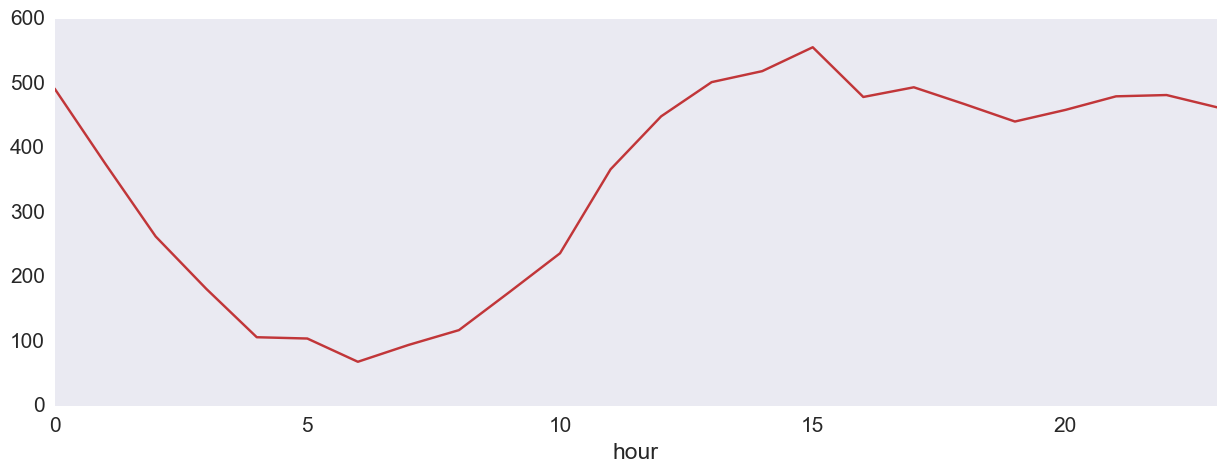

In [66]:
df[df.dayofweek == 6].groupby('hour').size().plot()

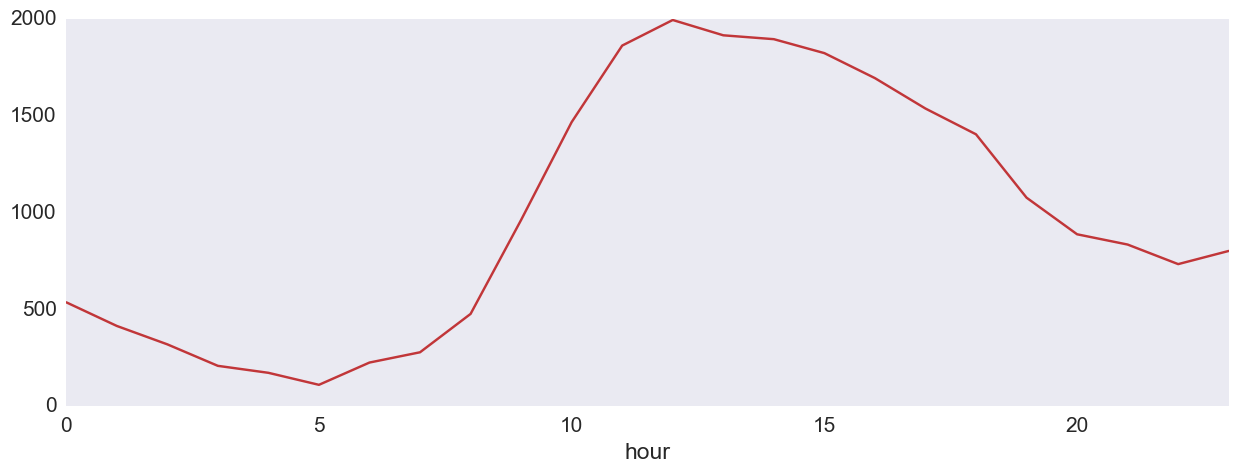

In [68]:
df[df.dayofweek == 1].groupby('hour').size().plot()

array([2, 3, 4, 5, 6, 7, 1])